In [2]:
#Importing Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
#importing csv datafile and displaying top 5 rows
df=pd.read_csv("diabetes_data.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.strip()

In [5]:
#Renaming class to status and displaying top 5 rows after preporcessing.
df = df.rename({"class": "status"},axis="columns")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,status
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


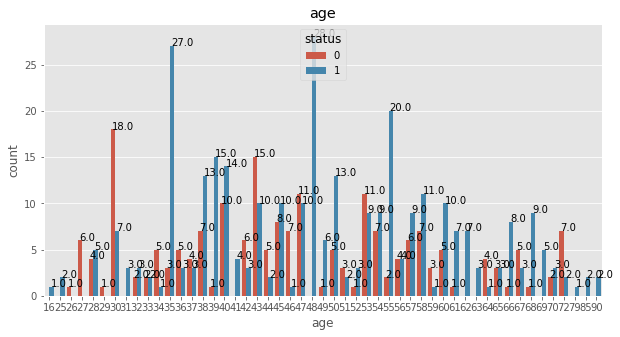

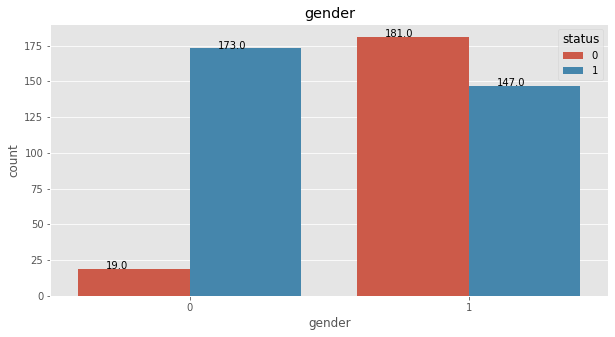

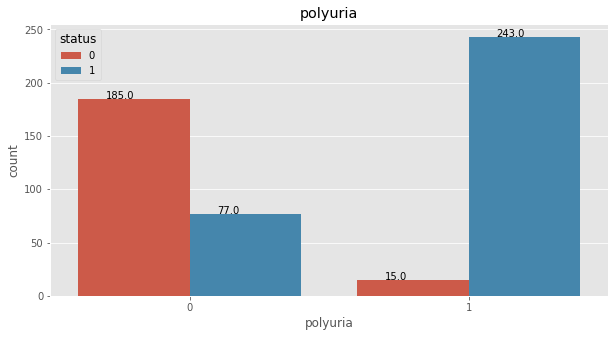

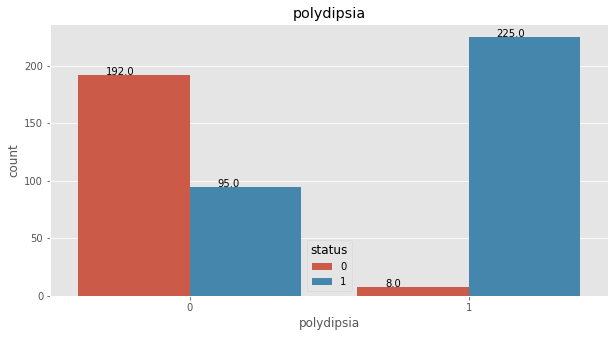

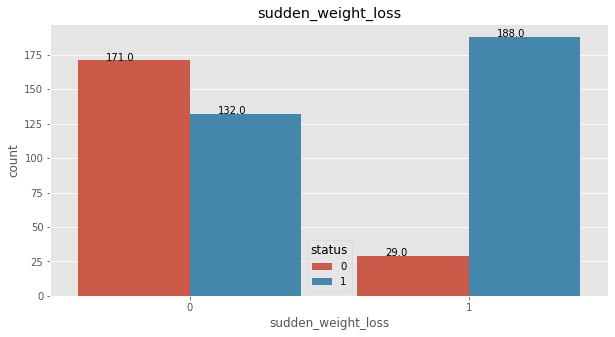

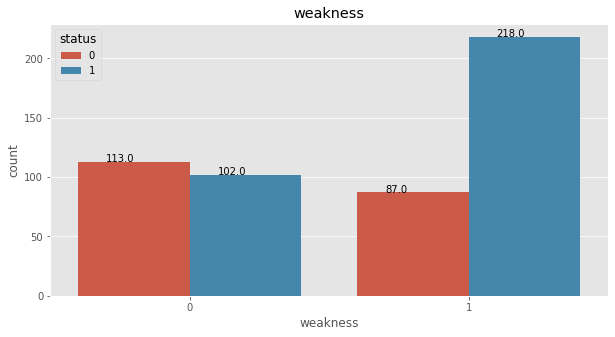

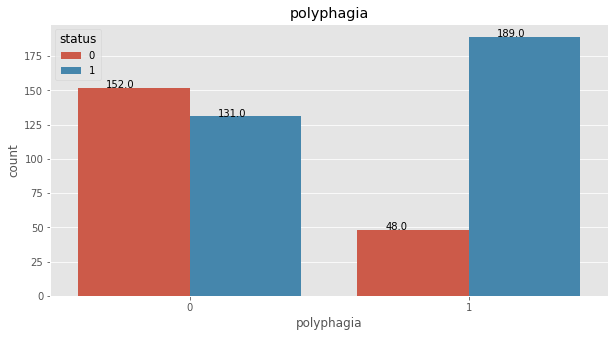

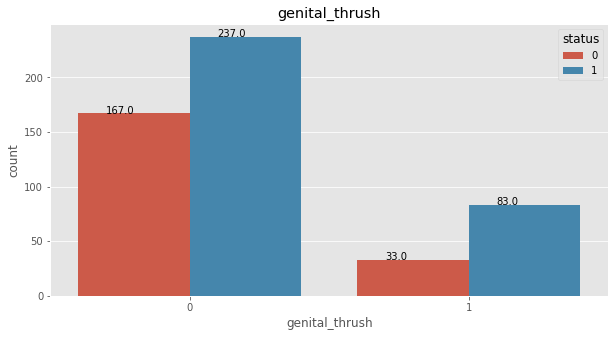

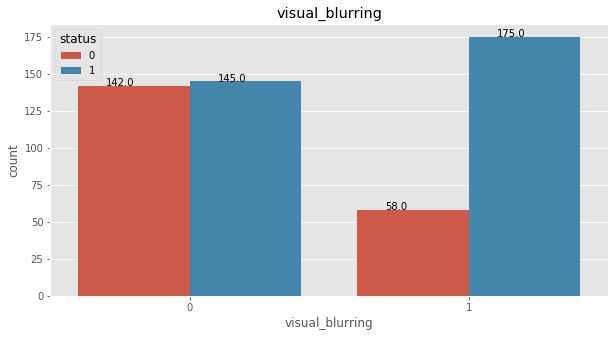

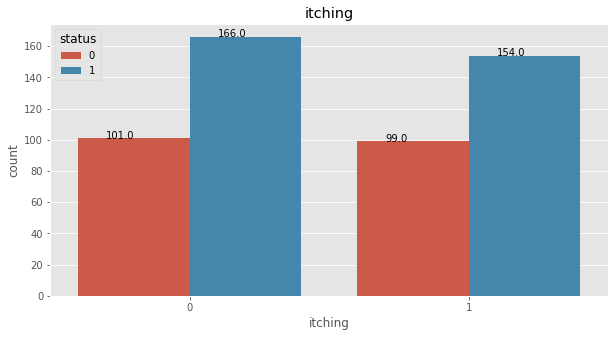

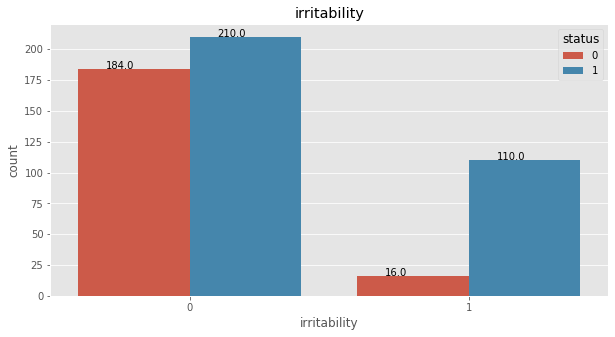

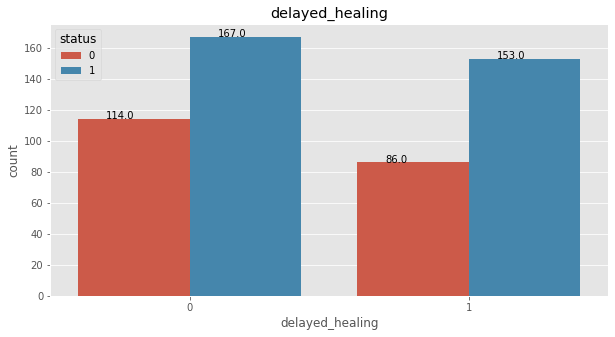

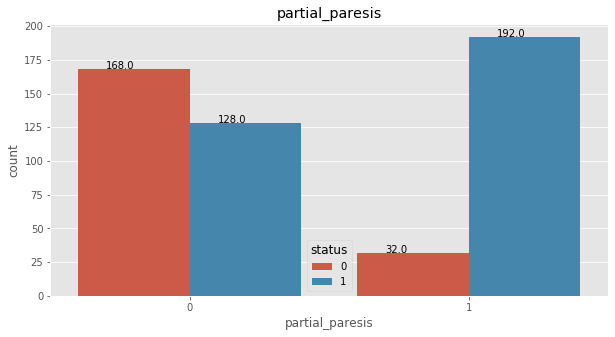

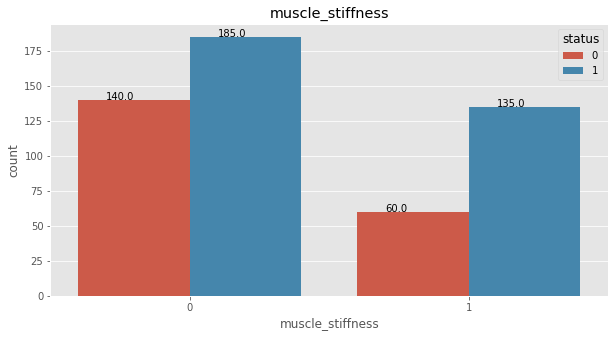

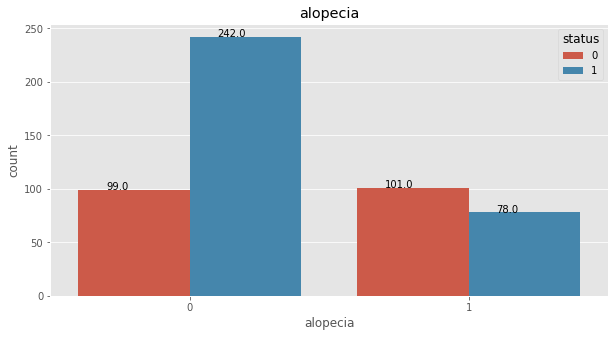

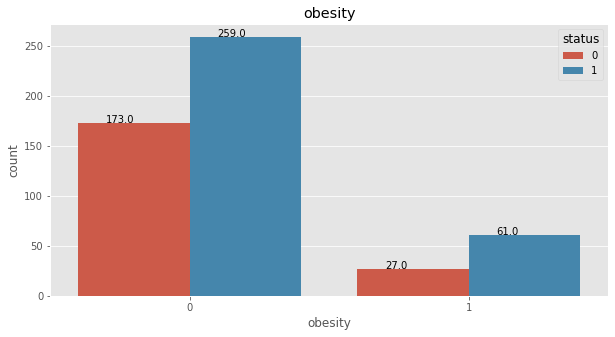

In [16]:

for i in df.columns[:-1]:
    plt.figure(figsize=(10,5))
    plt.title("%s" %i)
    ax=sns.countplot(df[i],hue=df['status'])
    for x in ax.patches:
        ax.annotate(format(float(x.get_height())), (x.get_x()+0.1, x.get_height()))

In [7]:
one_values = ["Male", "Positive", "Yes"]
zero_values = ["Female", "Negative", "No"]

for column in df.columns:
    df[column] = df[column].replace(to_replace=[one_values], value=1)
    df[column] = df[column].replace(to_replace=[zero_values], value=0)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,status
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [8]:
df_pos = df[df["status"] == 1]
df_neg = df[df["status"] == 0]
print("Average positive age: ", df_pos["age"].mean())
print("Average negative age: ", df_neg["age"].mean())

Average positive age:  49.071875
Average negative age:  46.36


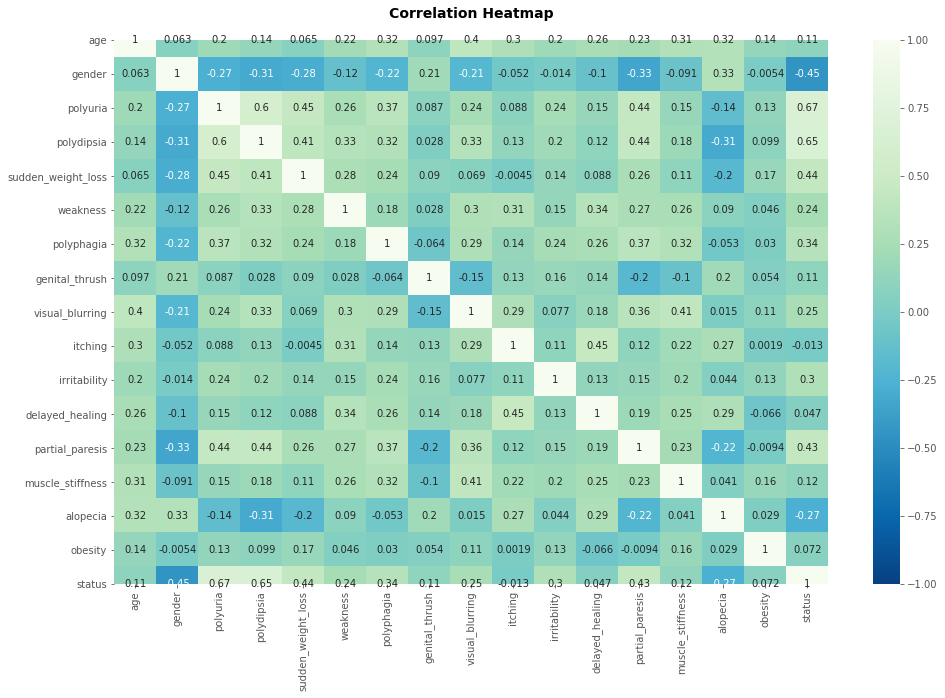

In [9]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap="GnBu_r")
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

In [10]:
feat_corr = df.corr()["status"].to_frame()
feat_corr

,status
age,0.108679
gender,-0.449233
polyuria,0.665922
polydipsia,0.648734
sudden_weight_loss,0.436568
weakness,0.243275
polyphagia,0.342504
genital_thrush,0.110288
visual_blurring,0.251300
itching,-0.013384


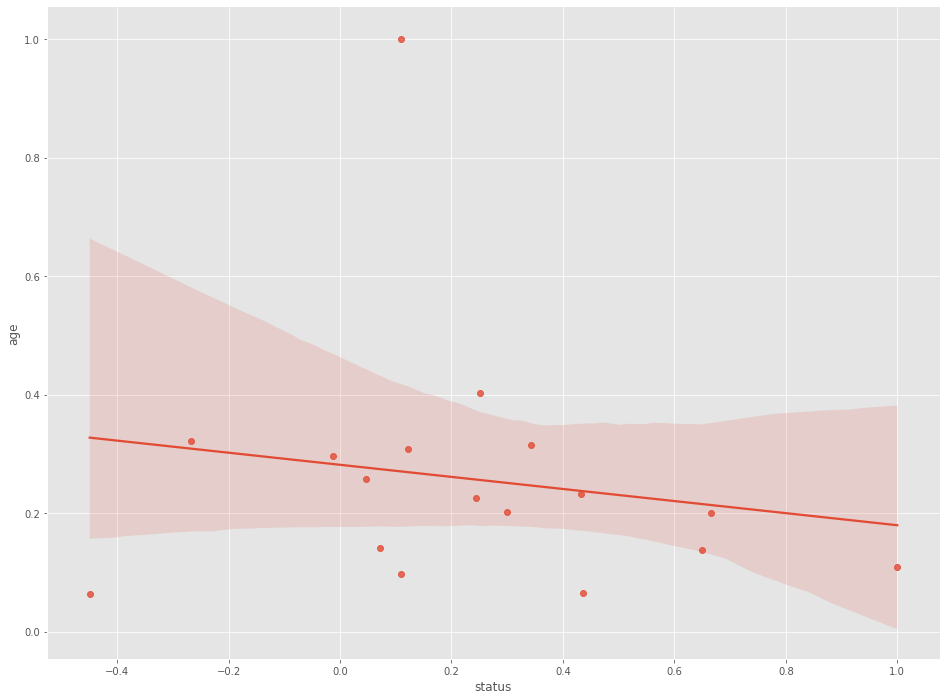

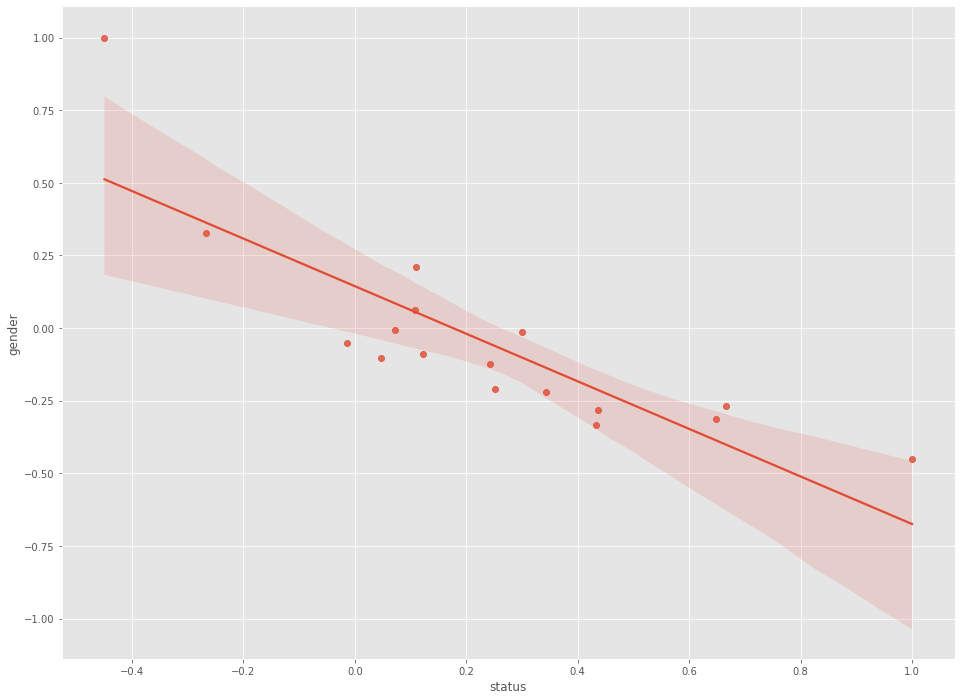

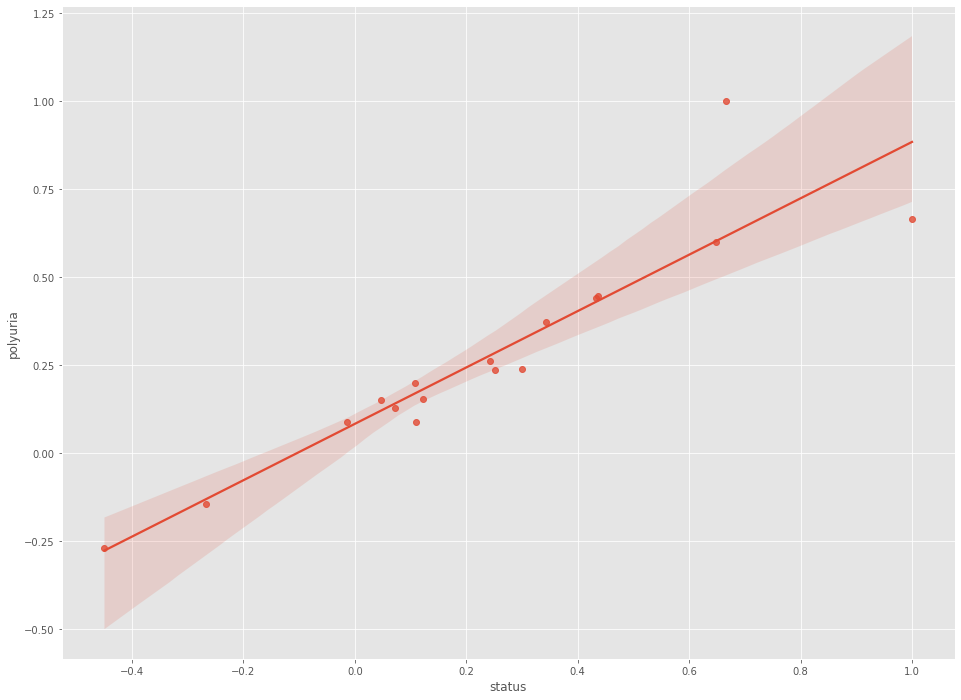

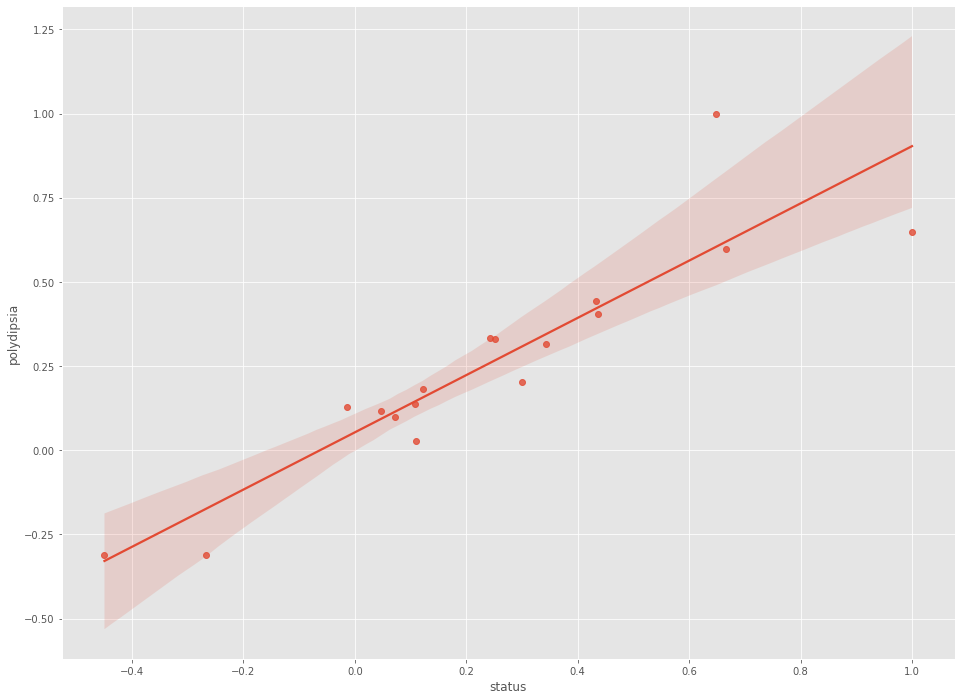

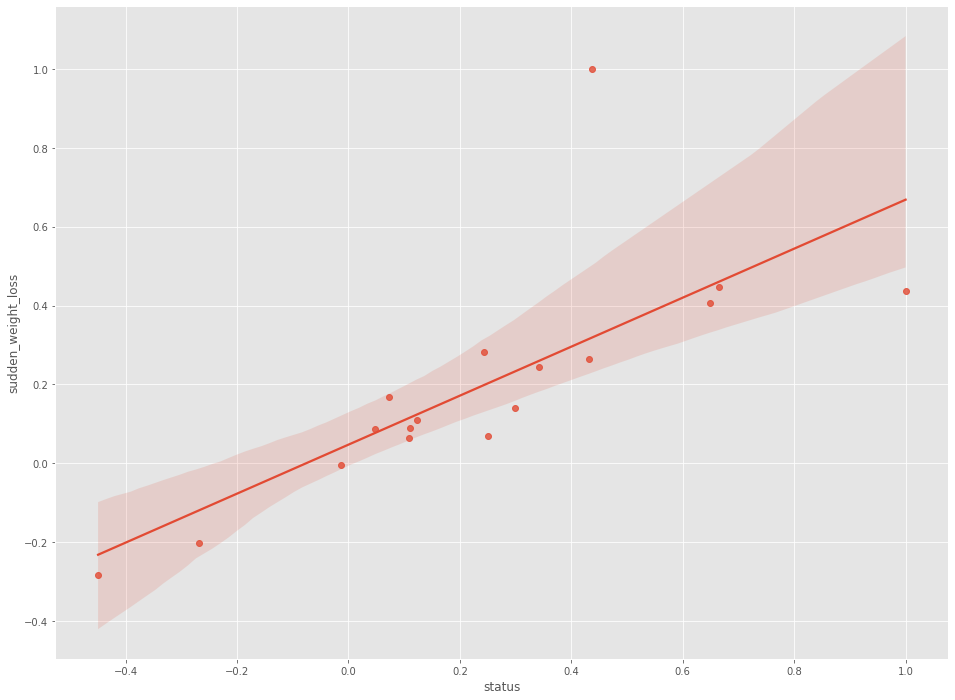

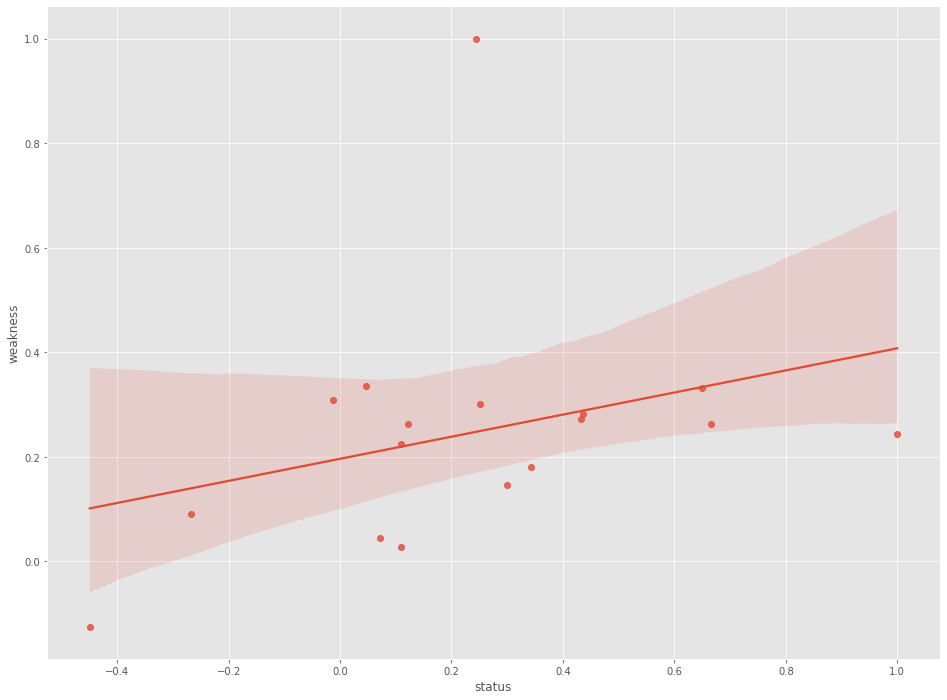

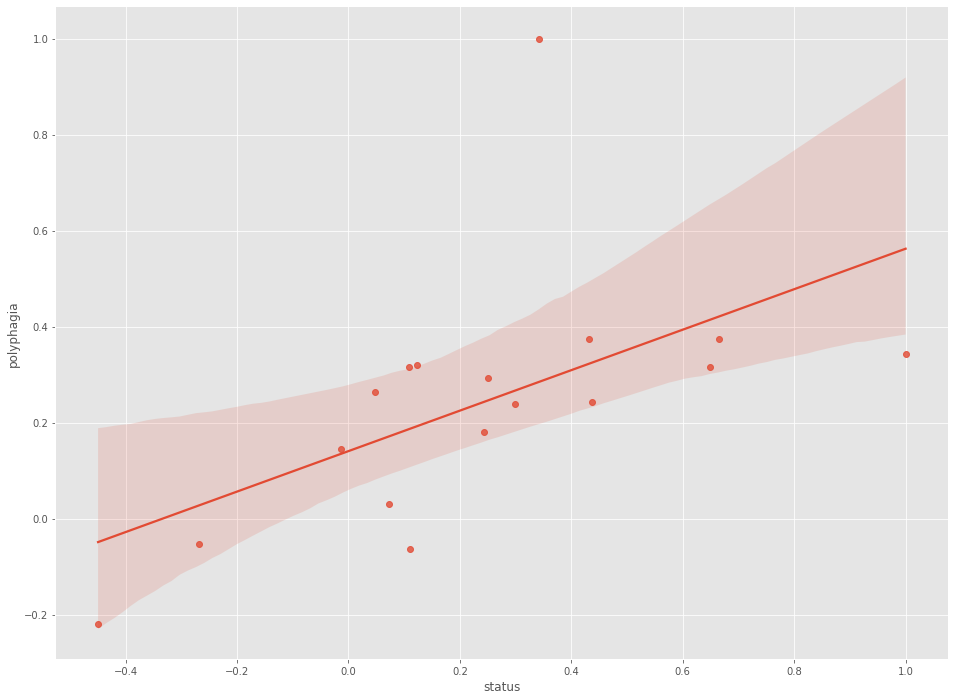

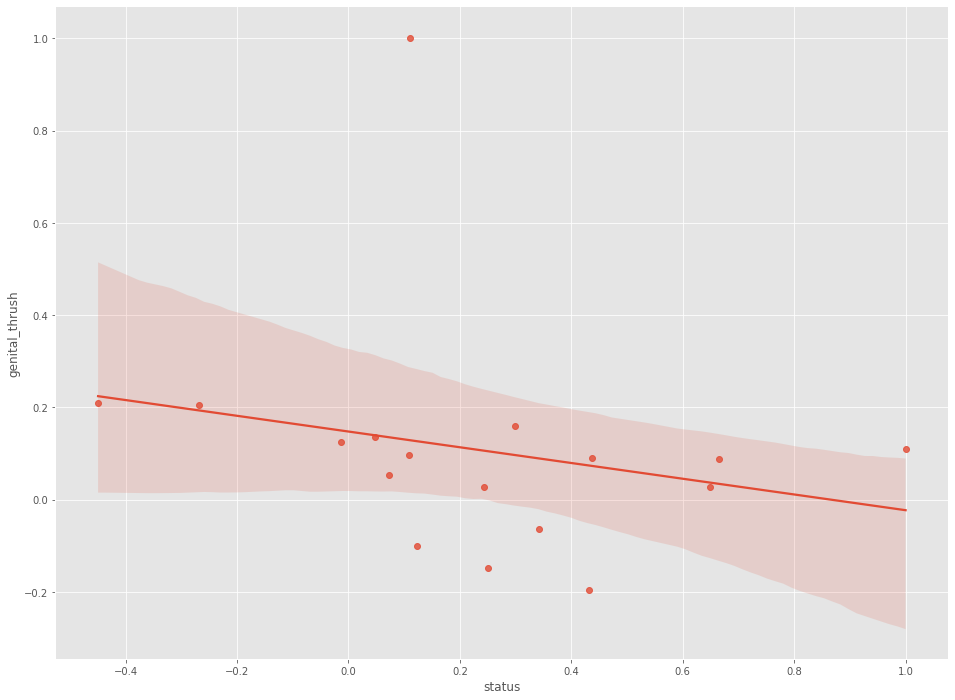

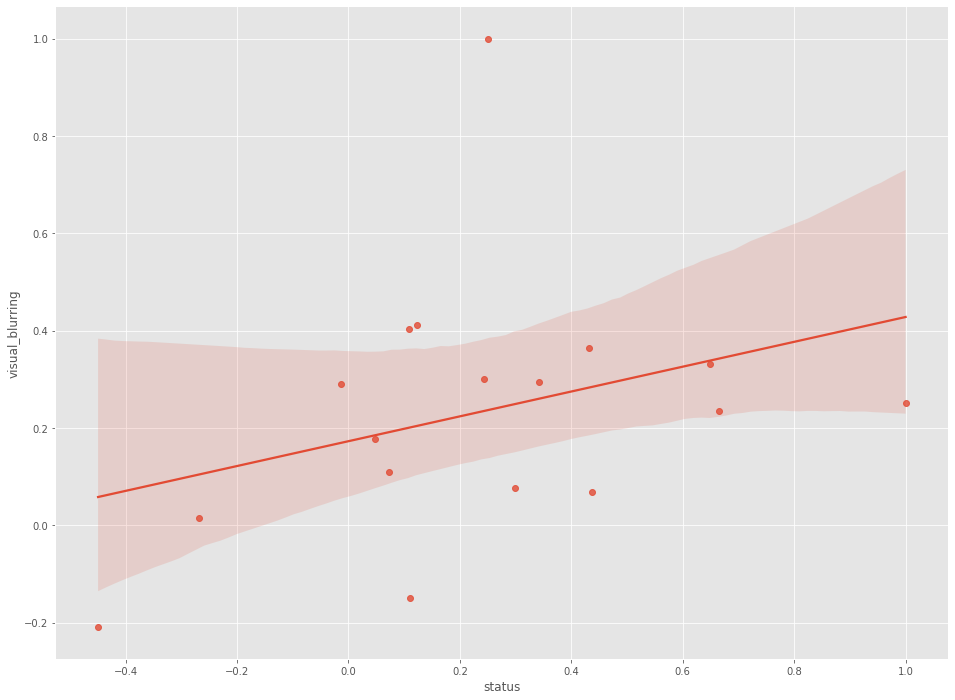

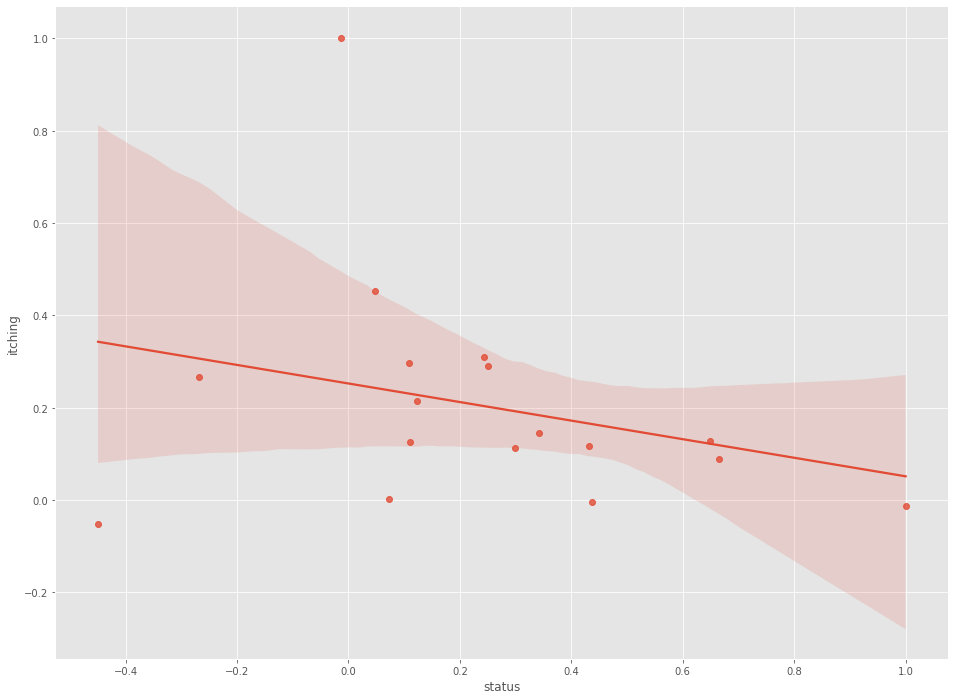

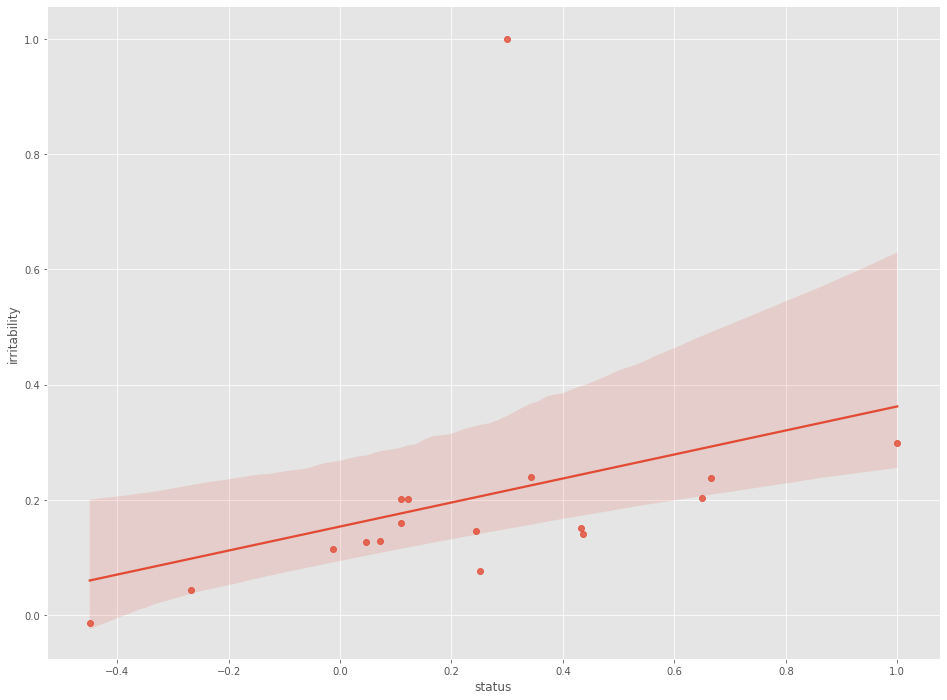

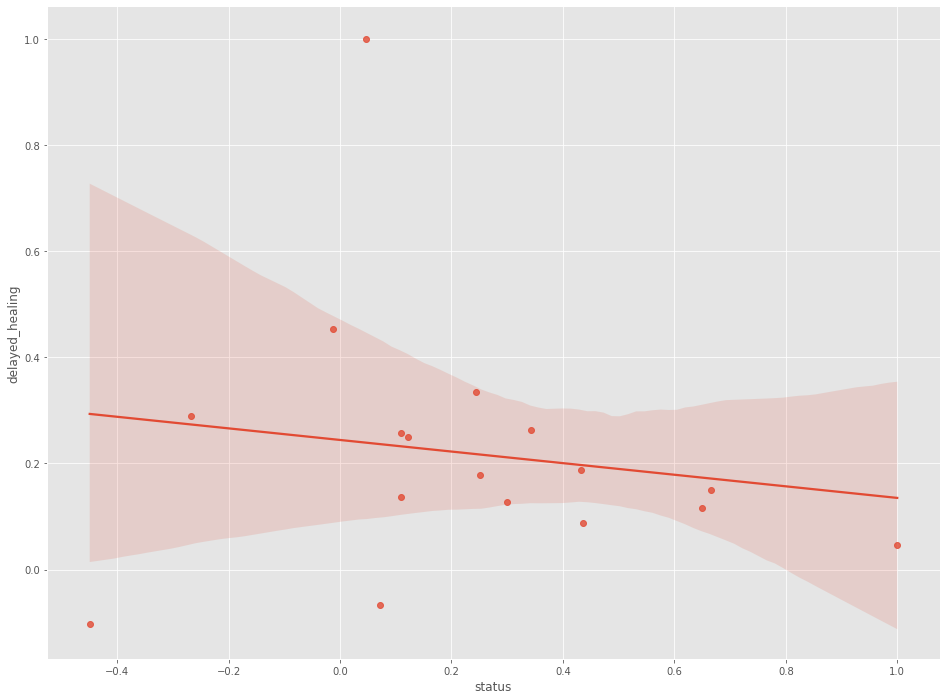

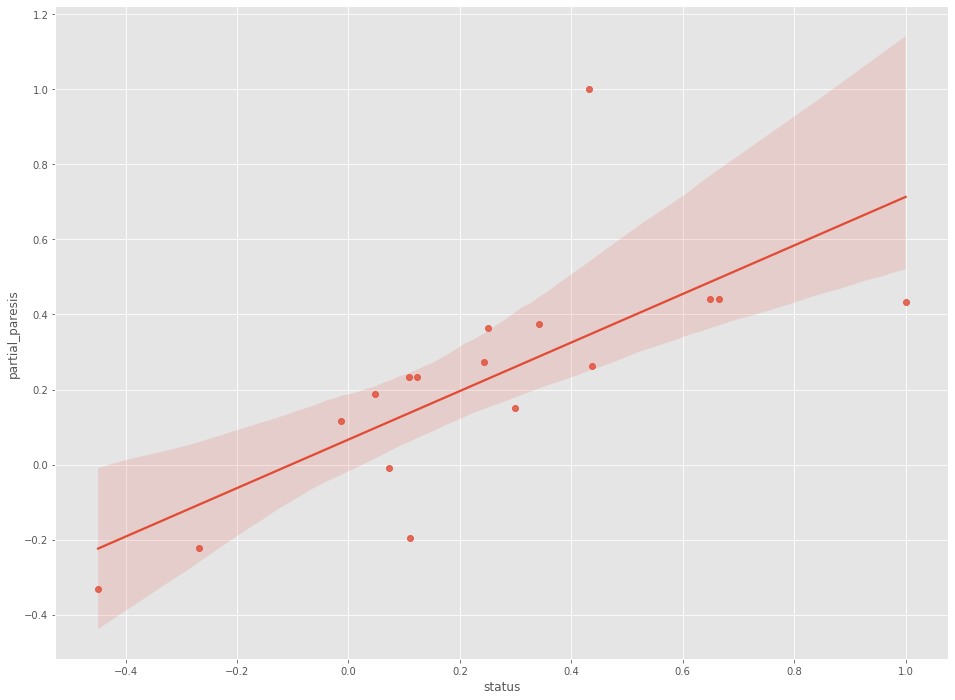

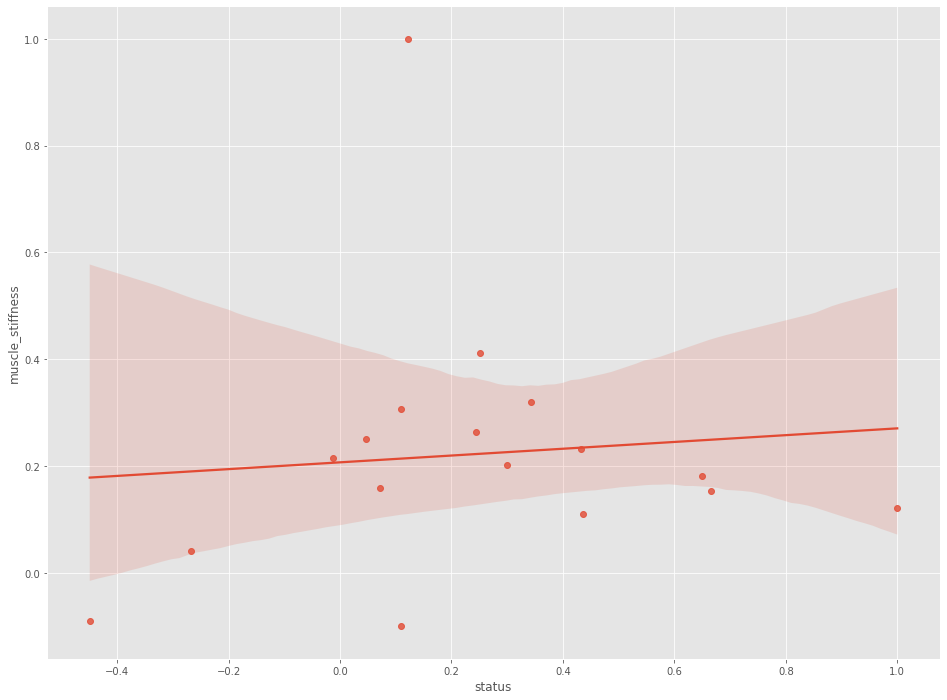

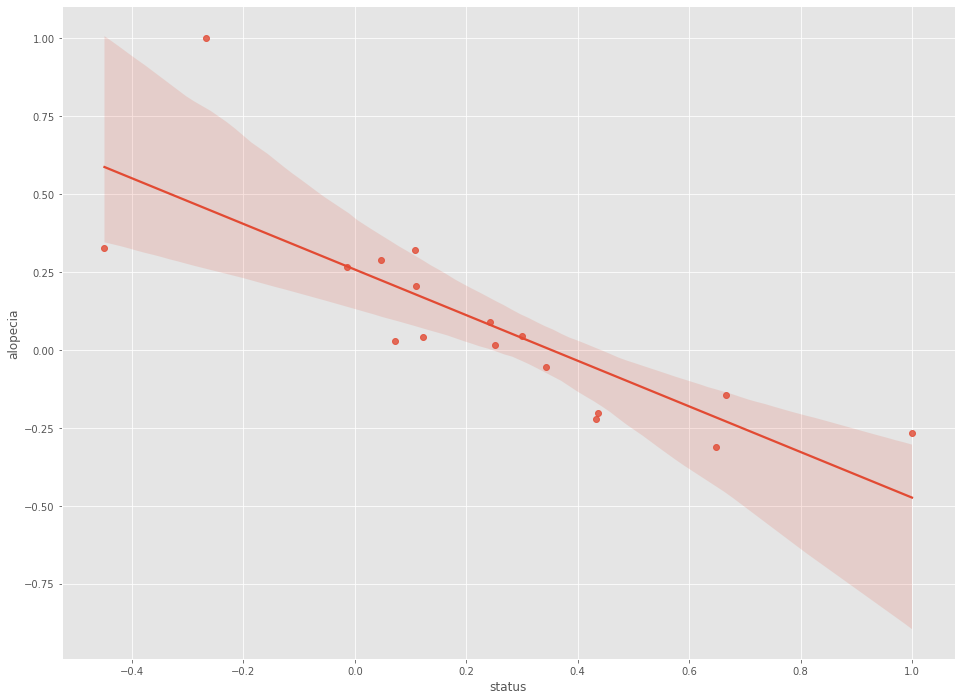

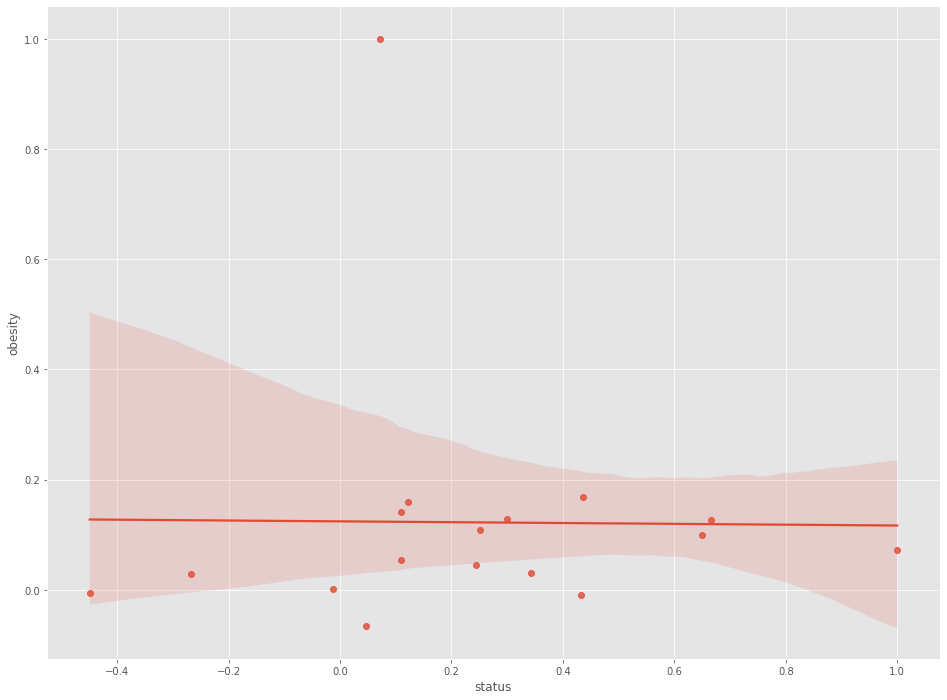

In [11]:
for i in df.columns[:-1]:
    plt.figure(figsize=(16,12))
    sns.regplot(x=df.corr()["status"],y=df.corr()[i])

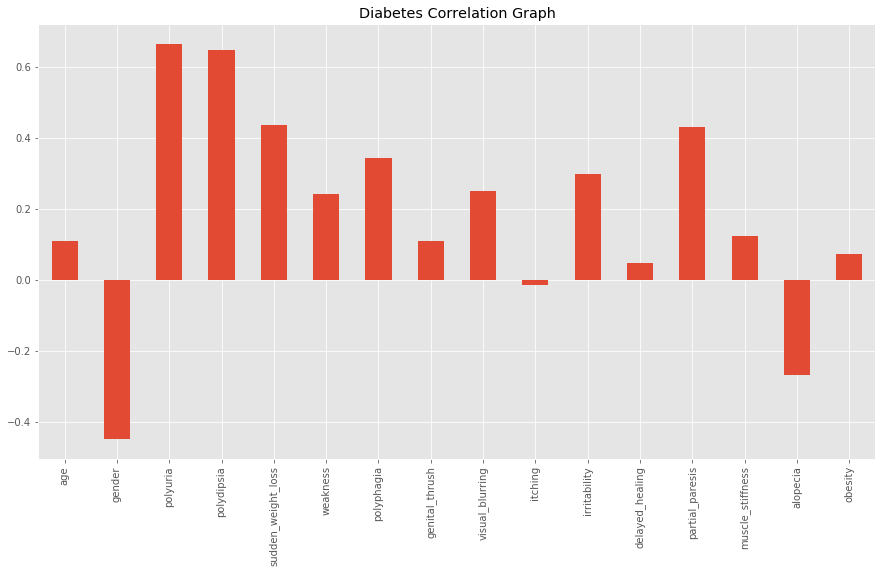

In [12]:
x=df.drop(["status"],axis=1)
y=df["status"]
x.corrwith(y).plot.bar(figsize = (15, 8), title = "Diabetes Correlation Graph",rot = 90)